# Preprocessing for simulation 1

## Effects at phylum level and order level

@ Aug. 16, Youngwon (youngwon08@gmail.com)

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils.extmath import softmax as softmax
from scipy.special import expit as sigmoid
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = "./data/simulation/s1"
path_genus = "./data/genus48"

def relu(x): 
    x[x <= 0.] = 0.
    return x

## Phylogenetic Tree information

In [3]:
## TODO: Should we start with genus48.csv?

phylogenetic_tree_info = pd.read_csv('%s/genus48_dic.csv' % path_genus)
# tree_level_list = ['Genus', 'Family', 'Order', 'Class', 'Phylum']
tree_level_list = phylogenetic_tree_info.columns[:-1].tolist()
phylogenetic_tree_info

,Genus,Family,Order,Class,Phylum,Domain
0,Streptococcus,Streptococcaceae,Lactobacillales,Bacilli,Firmicutes,Bacteria
1,Tropheryma,Cellulomonadaceae,Actinomycetales,Actinobacteria,Actinobacteria,Bacteria
2,Veillonella,Veillonellaceae,Selenomonadales,Negativicutes,Firmicutes,Bacteria
3,Actinomyces,Actinomycetaceae,Actinomycetales,Actinobacteria,Actinobacteria,Bacteria
4,Flavobacterium,Flavobacteriaceae,Flavobacteriales,Flavobacteria,Bacteroidetes,Bacteria
5,Prevotella,Prevotellaceae,Bacteroidales,Bacteroidia,Bacteroidetes,Bacteria
6,Porphyromonas,Porphyromonadaceae,Bacteroidales,Bacteroidia,Bacteroidetes,Bacteria
7,Parvimonas,Clostridiales_Incertae_Sedis_XI,Clostridiales,Clostridia,Firmicutes,Bacteria
8,Fusobacterium,Fusobacteriaceae,Fusobacteriales,Fusobacteria,Fusobacteria,Bacteria
9,Propionibacterium,Propionibacteriaceae,Actinomycetales,Actinobacteria,Actinobacteria,Bacteria


In [4]:
print('------------------------------------------------------------------------------------------')
print('Phylogenetic tree level list: %s' % tree_level_list)
print('------------------------------------------------------------------------------------------')
phylogenetic_tree_dict = {'Number':{}}
for tree_lvl in tree_level_list:
    lvl_category = phylogenetic_tree_info[tree_lvl].unique()
    lvl_num = lvl_category.shape[0]
    print('%6s: %d' % (tree_lvl, lvl_num))
    phylogenetic_tree_dict[tree_lvl] = dict(zip(lvl_category, np.arange(lvl_num)))
    phylogenetic_tree_dict['Number'][tree_lvl]=lvl_num
print('------------------------------------------------------------------------------------------')
print('Phylogenetic_tree_dict info: %s' % list(phylogenetic_tree_dict.keys()))
print('------------------------------------------------------------------------------------------')

------------------------------------------------------------------------------------------
Phylogenetic tree level list: ['Genus', 'Family', 'Order', 'Class', 'Phylum']
------------------------------------------------------------------------------------------
 Genus: 48
Family: 40
 Order: 23
 Class: 17
Phylum: 9
------------------------------------------------------------------------------------------
Phylogenetic_tree_dict info: ['Number', 'Order', 'Phylum', 'Genus', 'Class', 'Family']
------------------------------------------------------------------------------------------


In [5]:
phylogenetic_tree = phylogenetic_tree_info.iloc[:,:-1]
for tree_lvl in tree_level_list:
    phylogenetic_tree[tree_lvl] = phylogenetic_tree[tree_lvl].map(phylogenetic_tree_dict[tree_lvl])
phylogenetic_tree = np.array(phylogenetic_tree)
phylogenetic_tree

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ 0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  0],
       [ 3,  3,  1,  1,  1],
       [ 4,  4,  3,  3,  2],
       [ 5,  5,  4,  4,  2],
       [ 6,  6,  4,  4,  2],
       [ 7,  7,  5,  5,  0],
       [ 8,  8,  6,  6,  3],
       [ 9,  9,  1,  1,  1],
       [10, 10,  7,  0,  0],
       [11, 11,  1,  1,  1],
       [12, 12,  0,  0,  0],
       [13, 13,  8,  7,  4],
       [14, 14,  0,  0,  0],
       [15,  2,  2,  2,  0],
       [16, 15,  5,  5,  0],
       [17, 16,  9,  1,  1],
       [18, 17, 10,  8,  4],
       [19,  4,  3,  3,  2],
       [20, 18, 11,  9,  0],
       [21, 15,  5,  5,  0],
       [22, 19, 12, 10,  5],
       [23, 20,  7,  0,  0],
       [24, 21,  5,  5,  0],
       [25, 15,  5,  5,  0],
       [26, 22, 13,  7,  4],
       [27, 23,  6,  6,  3],
       [28, 24, 14, 11,  6],
       [29, 25, 15, 12,  4],
       [30, 26, 16, 12,  4],
       [31,  2,  2,  2,  0],
       [32, 27,  1,  1,  1],
       [33, 28, 17, 13,  4],
       [34, 29

In [6]:
tree_weight_list = []
tree_weight_noise_list = []
num_dict = phylogenetic_tree_dict['Number']
for i in range(len(tree_level_list)-1):
    print('Build edge weights between [%6s, %6s]'%(tree_level_list[i],tree_level_list[i+1]))
    lower = phylogenetic_tree[:,i]
    upper = phylogenetic_tree[:,i+1]
    n_lower = num_dict[tree_level_list[i]]
    n_upper = num_dict[tree_level_list[i+1]]

    tree_w = np.zeros((n_lower,n_upper))
    tree_w_n = np.zeros_like(tree_w) + 0.01
    for j in range(n_upper):
        tree_w[lower[j==upper],j] = 1.
        tree_w_n[lower[j==upper],j] = 1.
    tree_weight_list.append(tree_w)
    tree_weight_noise_list.append(tree_w_n)

Build edge weights between [ Genus, Family]
Build edge weights between [Family,  Order]
Build edge weights between [ Order,  Class]
Build edge weights between [ Class, Phylum]


### Check Error

In [7]:
maskw_l1 = np.array(pd.read_csv('%s/mw1.csv' % path))
maskw_l2 = np.array(pd.read_csv('%s/mw2.csv' % path))
maskw_l3 = np.array(pd.read_csv('%s/mw3.csv' % path))
maskw_l4 = np.array(pd.read_csv('%s/mw4.csv' % path))
maskw_list = [maskw_l1,maskw_l2,maskw_l3,maskw_l4]
print([np.sum(np.abs(tw-mw)) for tw, mw in zip(tree_weight_noise_list, maskw_list)])

[0.0, 0.0, 0.0, 0.0]


# Regression effected with order level and phylum level selections

Aug. 10, 2019

## Experiments with 1000 replications

## Generating X: microbiome abundance data
* Using the data that Jing made, described in detail by Zhai et al. (2018a,b).
    * $n \times p$ OTU count matrix
    * Aggregating $p_0=2964$ OTUs to $p=48$ genus
* Sample size for each replication: $n = 1000$
    * Training $75%$; Test $25%$

* Phylogenetic tree levels:
    1. Genus: $m^0 = 48$
    1. Family: $m^1 = 40$
    1. Order: $m^2 = 23$
    1. Class: $m^3 = 17$
    1. Phylum: $m^4 = 9$

## Generation Y: a forward propagation approach

###  Ver 0: same weights with same true connection for each repeatition

#### (similar to the original version)

$x^0 = x^{input} \in \mathbb{R}^{n\times p}$ (input genus abundance data)

#### Before repeatition, 

* Select the true connection to disease (based on the phylogenetic tree information)
    1. Choose 4 indexes from the order nodes
    1. Construct the disease path according to the chosen order nodes.

* Construct the true weights. 
    1. For $i = 1,2,...,5$, $w^{i} \in \mathbb{R}^{m^{i-1} \times m^{i}}, b^{i} \in \mathbb{R}^{m^{i} \times 1},$
       $$w^{i}_{j,k} \sim \left\{\begin{matrix}
       \text{Uniform}(-2.5,3) \quad\quad  \text{associated with the disease} \\
%        \mathcal{N}(0,0.0001) \quad\quad  \text{not associaated with the disease} \\
       0 \quad\quad  \text{not associaated with the disease} \\
       0 \quad\quad\quad \text{not associaated with the phylogenetic trees}
       \end{matrix}\right.$$
       $$b^{i}_{k} \sim \mathcal{N}(0,4)$$

#### For each repeatition, 

* For $i = 1,2,...,4$,
    1. $h^i = w^{i} x^{i-1} + b^i$
    1. $x^{i} = \text{ReLU}(h^i) \in \mathbb{R}^{m^{i}}$
* For the last layer for the classification with the K classes:
    1. $y=x^{5} = w^{5}x^{4}+b^{5} + 30$

In [11]:
true_tree_idx_list

[array([ 1,  3,  5,  6,  7,  9, 11, 16, 17, 21, 24, 25, 32, 37, 38, 41, 44,
        46, 47]),
 array([ 1,  3,  5,  6,  7,  9, 11, 15, 16, 21, 27, 32, 34, 38, 39]),
 array([1, 4, 5, 9]),
 array([1, 4, 5]),
 array([0, 1, 2])]

In [19]:
verbose=False
count_path = 'data/simulation/count/'
x_list = np.array(pd.read_csv('data/simulation/gcount_list.csv', header=None)[0])
# np.random.seed(15)
np.random.seed(19)
print('-------------------------------------------------------------------------------')
print('Generation True Connection to disease')
order_idx = np.array([5,4,1,9]) # 5(0) and 4(2) are effect at order level, 1(1) and 9(1) are effects at phylum level
phylum_idx = np.array([1,0,2]) # 1(1, 9) are effect at phylum level, 1(6) and 3(5) are effects at order level

true_tree_idx_list = []
for i in range(5):
    idx_order = np.unique(np.concatenate([phylogenetic_tree[:,i][phylogenetic_tree[:,2]==k] for k in order_idx]))
    idx_phylum = np.unique(np.concatenate([phylogenetic_tree[:,i][phylogenetic_tree[:,4]==k] for k in phylum_idx]))
    idx = np.intersect1d(idx_order, idx_phylum)
    print("%6s idx: %s"% (tree_level_list[i], idx))
    true_tree_idx_list.append(idx)
print('------------------------------------------------------------------------------------------')
true_tree_weight_list = []
num_dict = phylogenetic_tree_dict['Number']
for i in range(len(tree_level_list)-1):
    print('Build true edge weights between [%6s, %6s]'%(tree_level_list[i],tree_level_list[i+1]))
    lower = phylogenetic_tree[:,i]
    upper = phylogenetic_tree[:,i+1]
    n_lower = num_dict[tree_level_list[i]]
    n_upper = num_dict[tree_level_list[i+1]]
    tree_w = np.zeros((n_lower,n_upper), dtype=np.float32)
    for j in true_tree_idx_list[i]:
        tree_w[j,upper[lower==j]] = 1.
    true_tree_weight_list.append(tree_w)
    np.save('%s/ver0/tw_%d.npy'%(path,i+1), np.repeat([tree_w], x_list.shape[0], axis=0))
    print('Saved true edge weights between [%6s, %6s] to %s/ver0/tw_%d.npy'%(tree_level_list[i],tree_level_list[i+1],path,i+1))

print('-------------------------------------------------------------------------------')
print('Generation y')

yweight_list = []
ybias_list = []
for i in range(len(true_tree_weight_list)):
    yw = np.random.uniform(-2.5,3., true_tree_weight_list[i].shape).astype(np.float32) * true_tree_weight_list[i] # left only the weights on the true connections to the disease
    yb = np.random.normal(0,4, true_tree_weight_list[i].shape[-1]).astype(np.float32)
    yw = np.repeat([yw], x_list.shape[0], axis=0)
    yb = np.repeat([yb], x_list.shape[0], axis=0)
    yweight_list.append(yw)
    ybias_list.append(yb)
    np.save('%s/ver0/solw_%d.npy'%(path,i), yw)
    np.save('%s/ver0/solb_%d.npy'%(path,i), yb)
    
ywc = np.zeros((true_tree_weight_list[3].shape[-1],1), dtype=np.float32)
ywc[:3,0] = np.random.uniform(-2.5,3., 3).astype(np.float32)
# ywc = np.expand_dims(np.array([-0.025, 0.15, -0.35, 0, 0, 0, 0, 0, 0]), axis=-1)
ywc[:,0] = ywc[:,0] * (np.sum(true_tree_weight_list[-1], axis=0) > 0).astype(np.float32)
ywc = np.repeat([ywc], x_list.shape[0], axis=0)
ybc = np.random.normal(0,4, ywc.shape[-1]).astype(np.float32)
ybc = np.repeat([ybc], x_list.shape[0], axis=0)
np.save('%s/ver0/solw_%d.npy'%(path,len(true_tree_weight_list)), ywc)
# np.save('%s/ver0/solb_%d.npy'%(path,len(true_tree_weight_list)), ybc)

newy_all = []
for fold in range(x_list.shape[0]):
    x = pd.read_csv('%s/%s'%(count_path, x_list[fold])) # input x
    mat = np.matrix(x)
    prepro = MinMaxScaler()
    prepro.fit(mat)
    x = pd.DataFrame(prepro.transform(mat), columns = list(x.columns))
    h = np.array(x, dtype=np.float32)
    for i, (yw, yb) in enumerate(zip(yweight_list,ybias_list)):
        yw_noise = yw[fold]
#         yw_noise += np.random.normal(0,0.0001, true_tree_weight_list[i].shape) \
#                     *(1.-true_tree_weight_list[i])*(tree_weight_list[i]) # add noise on the tree
        h = relu(np.dot(h, yw_noise) + np.repeat([yb[fold]], h.shape[0], axis=0))
    h = np.dot(h, ywc[fold])
    p = h + np.repeat([ybc[fold]], h.shape[0], axis=0)
    newy = p[:,0]
    newy_all.append(newy)
newy_all = pd.DataFrame(np.stack(newy_all).T)
newy_all.to_csv('%s/ver0/y.csv'%path, index=False)
np.save('%s/ver0/solb_%d.npy'%(path,len(true_tree_weight_list)), ybc)

-------------------------------------------------------------------------------
Generation True Connection to disease
 Genus idx: [ 1  3  5  6  7  9 11 16 17 21 24 25 32 37 38 41 44 46 47]
Family idx: [ 1  3  5  6  7  9 11 15 16 21 27 32 34 38 39]
 Order idx: [1 4 5 9]
 Class idx: [1 4 5]
Phylum idx: [0 1 2]
------------------------------------------------------------------------------------------
Build true edge weights between [ Genus, Family]
Saved true edge weights between [ Genus, Family] to ./data/simulation/s1/ver0/tw_1.npy
Build true edge weights between [Family,  Order]
Saved true edge weights between [Family,  Order] to ./data/simulation/s1/ver0/tw_2.npy
Build true edge weights between [ Order,  Class]
Saved true edge weights between [ Order,  Class] to ./data/simulation/s1/ver0/tw_3.npy
Build true edge weights between [ Class, Phylum]
Saved true edge weights between [ Class, Phylum] to ./data/simulation/s1/ver0/tw_4.npy
-------------------------------------------------------

/DATA/home/muha/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
newy_all

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,49.059067,44.004501,46.698997,56.411449,51.530067,69.756226,68.057129,43.421898,55.168182,47.446201,...,47.088863,58.038948,58.795067,45.280098,49.531174,45.068367,45.405762,42.573799,50.233627,43.331936
1,48.240364,45.962109,48.259102,51.502464,43.377468,43.339165,58.008553,53.821411,51.776096,42.566322,...,55.644749,40.833103,49.825256,45.788174,47.831783,53.118404,46.654297,49.071430,53.235142,51.798412
2,47.862362,53.200768,44.428810,37.541176,52.557632,44.964729,45.622402,46.953632,47.963551,47.245544,...,44.409046,51.547867,42.024113,49.603378,62.264854,44.125492,44.360939,43.192493,45.159317,44.204048
3,44.649178,45.922710,42.758827,50.681602,42.168575,45.730343,50.665947,36.112305,52.251652,44.637661,...,47.137363,52.564377,45.110512,46.720963,47.719158,45.460693,51.019199,38.621292,43.640110,60.359352
4,54.709541,35.620224,47.158230,61.360062,42.863476,44.333923,44.966198,48.239651,42.651714,49.242851,...,58.035637,50.371639,36.024376,46.480106,43.179470,45.410950,51.485935,48.874317,54.813053,37.132725
5,44.538109,50.979740,57.555771,50.895519,42.127438,49.124031,46.594849,40.981339,39.379074,49.274635,...,51.979309,44.332043,49.850243,51.480515,49.612923,52.644035,50.240711,35.914967,47.543659,42.794861
6,60.402298,45.822636,49.498997,47.042385,42.657333,48.170086,50.067150,42.974724,50.351269,45.760372,...,43.195675,43.563446,54.717339,51.602459,43.300804,44.151646,53.084354,42.124557,47.079834,43.672020
7,36.930370,52.434105,50.289806,38.489796,48.312634,32.067116,43.871849,43.976490,34.157410,50.891769,...,45.511986,47.438103,54.004093,46.845749,30.778973,42.975582,48.861790,45.215199,59.444389,43.119171
8,44.222244,41.424919,40.743492,42.841450,41.441521,50.777218,52.985889,45.392330,48.334976,61.548027,...,41.436726,44.571972,44.204170,51.483006,43.972839,50.577183,44.627586,41.729836,49.344242,53.346199
9,54.592926,44.815060,61.214478,51.185612,50.740974,74.197823,43.684586,44.847378,49.259346,44.847343,...,42.950539,53.447025,45.232796,66.894615,50.693745,43.591194,46.778885,43.085892,42.079689,43.441120


(array([      0.,       0.,       0.,       0.,       0., 1000000.,
              0.,       0.,       0.,       0.]),
 array([10.67679501, 10.77679501, 10.87679501, 10.97679501, 11.07679501,
        11.17679501, 11.27679501, 11.37679501, 11.47679501, 11.57679501,
        11.67679501]),
 <a list of 10 Patch objects>)

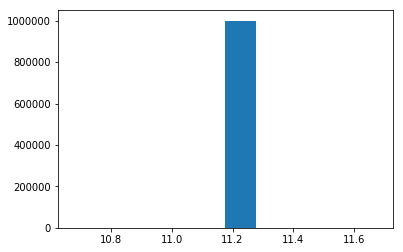

In [14]:
plt.hist(np.array(newy_all).flatten())